### Install Python 3.10.8 because Colab is a boomer

In [1]:
!python --version

Python 3.10.8


### Install and import a bunch of libraries and modules

<html>
<ol>
<li>PyTorch and submodules (Python machine learning library)</li>
<li>PyTorch Geometric (machine learning library for graph-based learning)</li>
<li>Matplotlib (drawing and plotting library)</li>
<li>NetworkX (Python data science/network/graph library)</li>
</ol>

In [2]:
import torch
import torch.nn as nn
from torch_geometric import *

In [3]:
from torch_geometric.datasets import QM9, ZINC, MoleculeNet

In [4]:
from torch_geometric.data import *

In [5]:
from torch_geometric.utils.convert import to_networkx

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

In [7]:
from torch_geometric.transforms import NormalizeFeatures

In [8]:
import scipy
import scipy.io

### The QM9 Dataset
Loads the QM9 Dataset -- a datset with 134K organic molecules -- from the PyTorch Geometric `datasets` submodule.  
This dataset contains all the molecules represented in a graphical format, where atoms are vertices and edges are bonds between atoms.

Problem: cannot download the QM9 dataset it seems, everything else is working perfectly

In [9]:
dataset = QM9('', transform=None, pre_transform=None, pre_filter=None)

⬇️ Function that gets information about a molecule from the dataset

In [10]:
def get_info(idx: int):
    data = dataset[idx]
    print(f'Number of nodes: {data.num_nodes}')
    print(f'Number of edges: {data.num_edges}')
    print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
    print(f'Has isolated nodes: {data.has_isolated_nodes()}')
    print(f'Has self-loops: {data.has_self_loops()}')
    print(f'Is undirected: {data.is_undirected()}')
    return data

⬇️ Function that prints the data associated with the molecule

In [11]:
def mol_info(data):
    for prop in data: print(prop)

⬇️ Function that draws the graphical representation of the molecule

In [12]:
def draw_mol(data):
    vis = to_networkx(data)
    plt.figure(1, figsize=(8,8))
    nx.draw(vis)
    plt.show()

Create a **Dataset Loader** class for O.O.P purposes

In [13]:
class DatasetLoader:
    def __init__(self):
        self.dataset = dataset
        self.name = "Dataset Loader"

    def get_info(self, idx: int):
        data = self.dataset[idx]
        print(f'Number of nodes: {data.num_nodes}')
        print(f'Number of edges: {data.num_edges}')
        print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
        print(f'Has isolated nodes: {data.has_isolated_nodes()}')
        print(f'Has self-loops: {data.has_self_loops()}')
        print(f'Is undirected: {data.is_undirected()}')
        
    def mol_info(self, data):
        for prop in data: print(prop)

    def draw_mol(self, data):
        vis = to_networkx(data)
        plt.figure(1, figsize=(8,8))
        nx.draw(vis)
        plt.show()

    def __len__(self) -> int:
        return len(self.dataset) #13081

    def __getitem__(self, idx, verbose=False, draw=False):
        if verbose:
            self.get_info(idx)
            print()
        data = self.dataset[idx]
        self.mol_info(data)
        if draw:
            print()
            self.draw_mol(data)
        return data

In [14]:
DL = DatasetLoader()

('x', tensor([[0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 4.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]))
('edge_index', tensor([[0, 0, 0, 0, 1, 2, 3, 4],
        [1, 2, 3, 4, 0, 0, 0, 0]]))
('edge_attr', tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]]))
('y', tensor([[    0.0000,    13.2100,   -10.5499,     3.1865,    13.7363,    35.3641,
             1.2177, -1101.4878, -1101.4098, -1101.3840, -1102.0229,     6.4690,
           -17.1722,   -17.2868,   -17.3897,   -16.1519,   157.7118,   157.7100,
           157.7070]]))
('pos', tensor([[-1.2700e-02,  1.0858e+00,  8.0000e-03],
        [ 2.2000e-03, -6.0000e-03,  2.0000e-03],
        [ 1.0117e+00,  1.4638e+00,

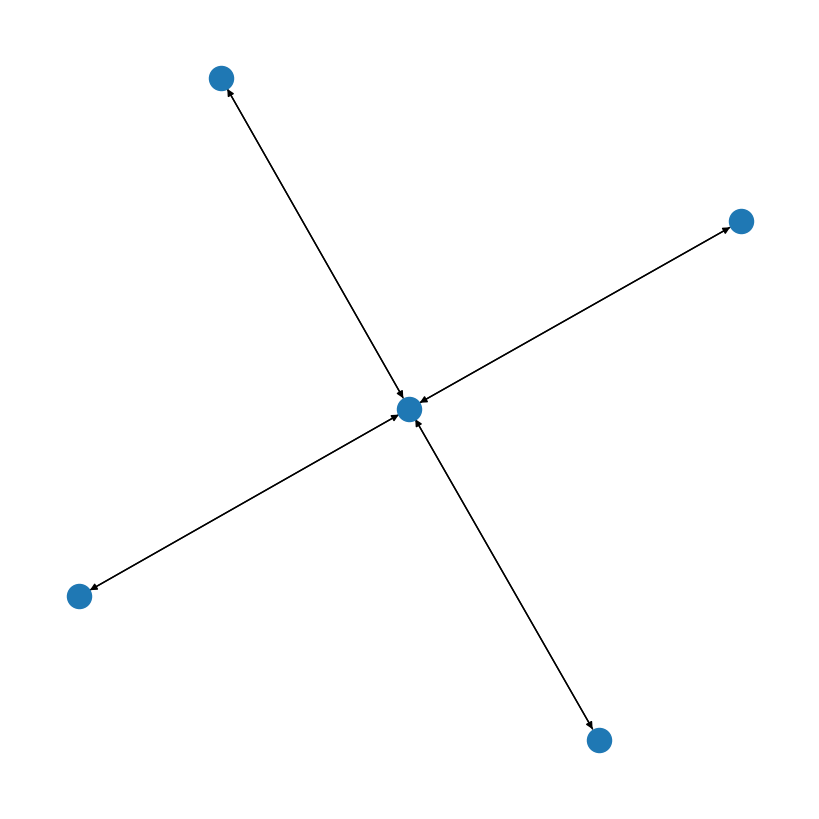

Data(x=[5, 11], edge_index=[2, 8], edge_attr=[8, 4], y=[1, 19], pos=[5, 3], idx=[1], name='gdb_1', z=[5])

In [90]:
DL.__getitem__(0, verbose=False, draw=True)

### Get the NetGAN model

Clone the repository; using original NetGAN

Better way to access models:

In [16]:
import sys
sys.path.insert(1, 'netgan_pytorch/netgan')

In [17]:
from models import *

In [18]:
from utils import *

In [19]:
from training import *

### Convert PyG data to Scipy Sparse Matrix

In [20]:
def pyg_to_ssm(idx: int, v: bool=False, d: bool=False):
    sample = DL.__getitem__(idx, verbose=v, draw=d)
    sample = to_networkx(sample)
    sample_mat = nx.to_scipy_sparse_matrix(sample)
    return sample, sample_mat

In [65]:
ch4, methane = pyg_to_ssm(0)

('x', tensor([[0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 4.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]))
('edge_index', tensor([[0, 0, 0, 0, 1, 2, 3, 4],
        [1, 2, 3, 4, 0, 0, 0, 0]]))
('edge_attr', tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]]))
('y', tensor([[    0.0000,    13.2100,   -10.5499,     3.1865,    13.7363,    35.3641,
             1.2177, -1101.4878, -1101.4098, -1101.3840, -1102.0229,     6.4690,
           -17.1722,   -17.2868,   -17.3897,   -16.1519,   157.7118,   157.7100,
           157.7070]]))
('pos', tensor([[-1.2700e-02,  1.0858e+00,  8.0000e-03],
        [ 2.2000e-03, -6.0000e-03,  2.0000e-03],
        [ 1.0117e+00,  1.4638e+00,

/var/folders/rw/56p7h0px0xl82phr2ps3qy8c0000gn/T/ipykernel_17491/3298640954.py:4: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  sample_mat = nx.to_scipy_sparse_matrix(sample)


In [89]:
torch_geometric.utils.convert.from_networkx(ch4)

Data(edge_index=[2, 8], num_nodes=5)

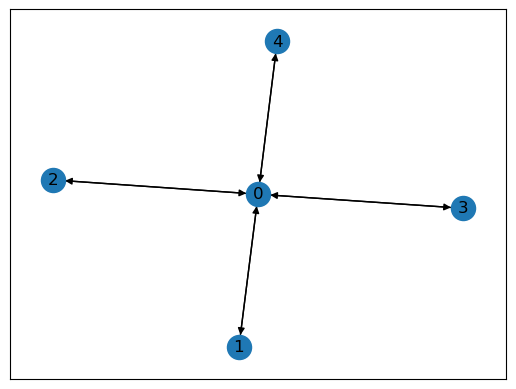

In [81]:
nx.draw_networkx(ch4, pos=None, arrows=None, with_labels=True)

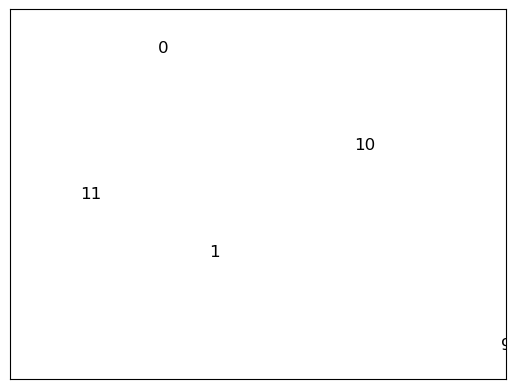

In [71]:
G = nx.dodecahedral_graph()
labels = nx.draw_networkx_labels(G, pos=nx.spring_layout(G))

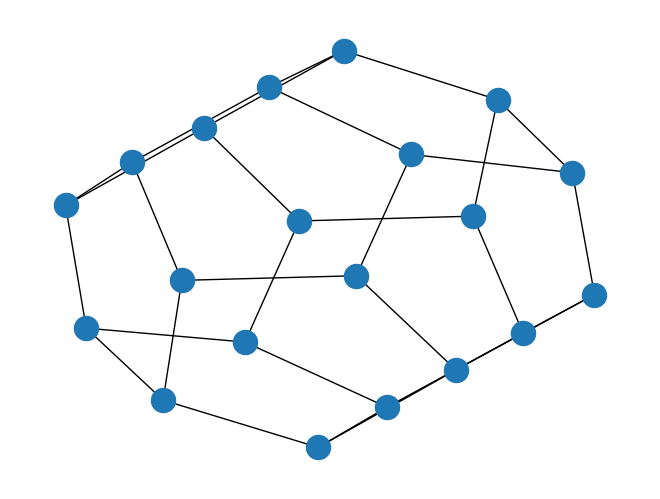

In [75]:
nx.draw(G)

In [73]:
nx.spring_layout(G)

{0: array([ 0.1549359, -0.8350708]),
 1: array([ 0.04715031, -0.22344488]),
 2: array([0.51004541, 0.24288926]),
 3: array([ 1.        , -0.07542716]),
 4: array([0.89544787, 0.42440687]),
 5: array([0.48353871, 0.91295801]),
 6: array([0.1808056 , 0.75054988]),
 7: array([-0.43789614,  0.64289565]),
 8: array([-0.54918454,  0.04841268]),
 9: array([-0.89365084, -0.43046802]),
 10: array([-0.48445046, -0.91005364]),
 11: array([-0.18275205, -0.75590822]),
 12: array([-0.50208807, -0.24466358]),
 13: array([-0.99345827,  0.07597794]),
 14: array([-0.78125665,  0.67226903]),
 15: array([-0.15531214,  0.83340068]),
 16: array([-0.05469909,  0.22898137]),
 17: array([ 0.54297257, -0.04333791]),
 18: array([ 0.43539811, -0.63913179]),
 19: array([ 0.78445377, -0.67523537])}

In [21]:
not_ch4, not_methane = pyg_to_ssm(18456)

('x', tensor([[0., 0., 0., 1., 0., 8., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 8., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 2.],
        [0., 0., 1., 0., 0., 7., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]))
('edge_index', tensor([[ 0,  1,  1,  1,  2,  2,  2,  2,  3,  3,  4,  4,  4,  4,  5,  5,  5,  5,
          6,  6,  6,  7,  7,  7,  7,  8,  9, 10, 11, 12],
        [ 1,  0,  2,  6,  1,  3,  7,  8,  2,  4,  3,  5,  7,  9,  4,  6, 10, 11,
          1,  5,  7,  2,  4,  6, 12,  2,  4,  5,  5,  7

/var/folders/rw/56p7h0px0xl82phr2ps3qy8c0000gn/T/ipykernel_17491/3298640954.py:4: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  sample_mat = nx.to_scipy_sparse_matrix(sample)


In [22]:
print(not_ch4)

DiGraph with 13 nodes and 30 edges


In [23]:
print(not_methane)

  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (1, 6)	1
  (2, 1)	1
  (2, 3)	1
  (2, 7)	1
  (2, 8)	1
  (3, 2)	1
  (3, 4)	1
  (4, 3)	1
  (4, 5)	1
  (4, 7)	1
  (4, 9)	1
  (5, 4)	1
  (5, 6)	1
  (5, 10)	1
  (5, 11)	1
  (6, 1)	1
  (6, 5)	1
  (6, 7)	1
  (7, 2)	1
  (7, 4)	1
  (7, 6)	1
  (7, 12)	1
  (8, 2)	1
  (9, 4)	1
  (10, 5)	1
  (11, 5)	1
  (12, 7)	1


### Now, let's try running NetGAN on a very small sample of the QM9 Dataset

In [24]:
import io

In [25]:
graph = nx.to_numpy_array(not_ch4)

In [26]:
graph

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [27]:
temp = nx.from_numpy_array(graph)

In [28]:
temp

In [29]:
graph[graph!=0] = 1.0
graph_nx = nx.from_numpy_array(graph)
graph_sparse = scipy.sparse.csr_matrix(graph)
n_edges = graph.sum()

In [30]:
print(f"This graph has {n_edges} edges!")

This graph has 30.0 edges!


In [31]:
graph_sparse

<13x13 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

In [32]:
not_graph_sparse = scipy.sparse.tril(graph_sparse).tocsr()

In [33]:
mst = scipy.sparse.csgraph.minimum_spanning_tree(not_graph_sparse)

In [34]:
mst[mst > 1] = 1
mst.eliminate_zeros()
ihatethis = not_graph_sparse - mst

In [35]:
print(ihatethis)

  (6, 5)	1.0
  (7, 4)	1.0
  (7, 6)	1.0


In [36]:
trainer = Trainer(graph_sparse, len(graph), set_ops=False)

**** Using VAL criterion for early stopping with max patience of: 5****
iteration: 1      critic: 6.226103      gen 0.038112
iteration: 11      critic: 0.908403      gen 0.058239
iteration: 21      critic: 0.179482      gen 0.087864
iteration: 31      critic: 0.015215      gen 0.020622
iteration: 41      critic: -0.252436      gen -0.042305
iteration: 51      critic: -0.613275      gen -0.096210
iteration: 61      critic: -0.697111      gen -0.018762
iteration: 71      critic: -0.865719      gen -0.079199
iteration: 81      critic: -0.989799      gen -0.061728
iteration: 91      critic: -1.108864      gen -0.078554
1
roc: 0.5000   avp: 0.5000   eo: 0.2000
Took 1.2937134186426797 minutes so far..


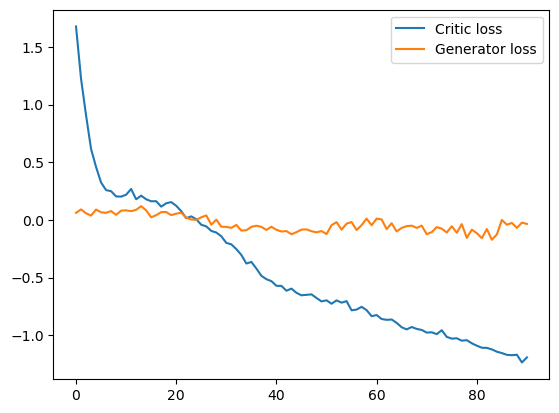

iteration: 101      critic: -1.230614      gen -0.026587
iteration: 111      critic: -1.246488      gen 0.032524
iteration: 121      critic: -1.272514      gen 0.031474
iteration: 131      critic: -1.314370      gen -0.052198
iteration: 141      critic: -1.298897      gen 0.003493
iteration: 151      critic: -1.353320      gen -0.073331
iteration: 161      critic: -1.359999      gen 0.000026
iteration: 171      critic: -1.410699      gen -0.016544
iteration: 181      critic: -1.409943      gen 0.014930
iteration: 191      critic: -1.487118      gen -0.025561
1
roc: 0.5000   avp: 0.5000   eo: 0.3333
Took 2.5696534514427185 minutes so far..


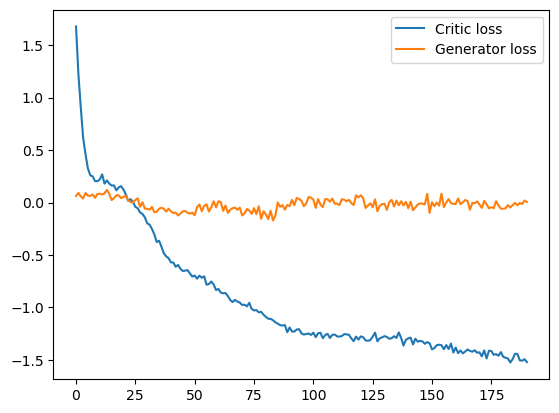

iteration: 201      critic: -1.487471      gen 0.003621
iteration: 211      critic: -1.529014      gen 0.006260
iteration: 221      critic: -1.526885      gen -0.064518
iteration: 231      critic: -1.571456      gen -0.032337
iteration: 241      critic: -1.560781      gen -0.037346
iteration: 251      critic: -1.558473      gen -0.031804
iteration: 261      critic: -1.558481      gen -0.060979
iteration: 271      critic: -1.562908      gen -0.080353
iteration: 281      critic: -1.546741      gen -0.131566
iteration: 291      critic: -1.579120      gen -0.223004
1
roc: 0.5000   avp: 0.5000   eo: 0.3333
Took 4.0364036679267885 minutes so far..


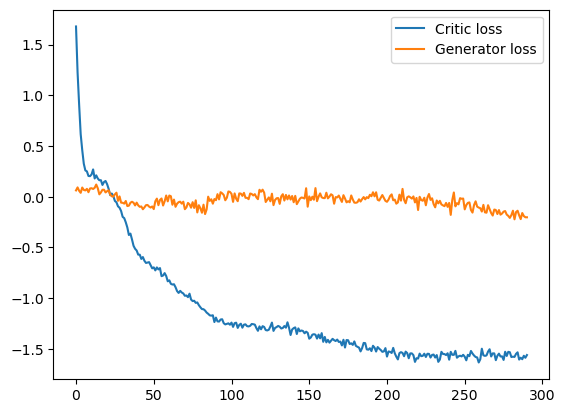

iteration: 301      critic: -1.569795      gen -0.159546
iteration: 311      critic: -1.613974      gen -0.164495
iteration: 321      critic: -1.582784      gen -0.118854
iteration: 331      critic: -1.609455      gen -0.179961
iteration: 341      critic: -1.648005      gen -0.127891
iteration: 351      critic: -1.645264      gen -0.117989
iteration: 361      critic: -1.686480      gen -0.115338
iteration: 371      critic: -1.661127      gen -0.144306
iteration: 381      critic: -1.663290      gen -0.079589
iteration: 391      critic: -1.653162      gen -0.166553
1
roc: 0.5000   avp: 0.5000   eo: 0.1333
Took 5.32981816927592 minutes so far..


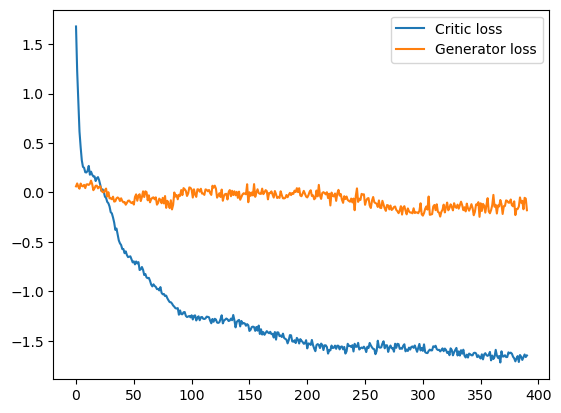

iteration: 401      critic: -1.601847      gen -0.134305
iteration: 411      critic: -1.668957      gen -0.148697
iteration: 421      critic: -1.637150      gen -0.076748
iteration: 431      critic: -1.664618      gen -0.079796
iteration: 441      critic: -1.717000      gen -0.179052
iteration: 451      critic: -1.646919      gen -0.084744
iteration: 461      critic: -1.701822      gen -0.124020
iteration: 471      critic: -1.664417      gen -0.061736
iteration: 481      critic: -1.633292      gen 0.008755
iteration: 491      critic: -1.684399      gen -0.063444
1


ValueError: Fewer non-zero entries in p than size

In [37]:
trainer.train(create_graph_every=100, plot_graph_every=100, num_samples_graph=1000, stopping_criterion='val')

1
11
21
31
41


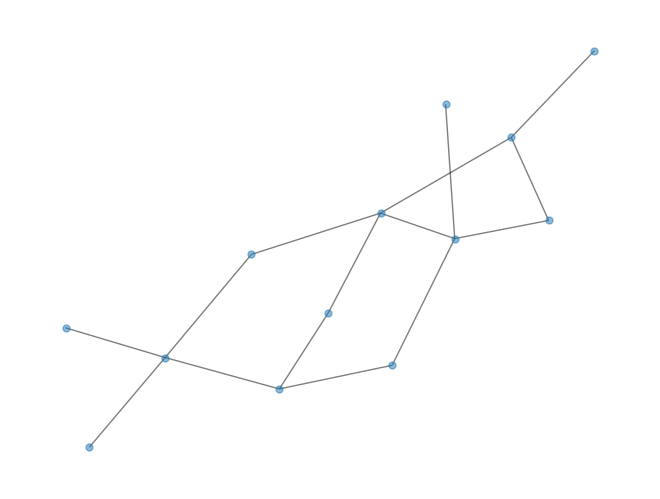

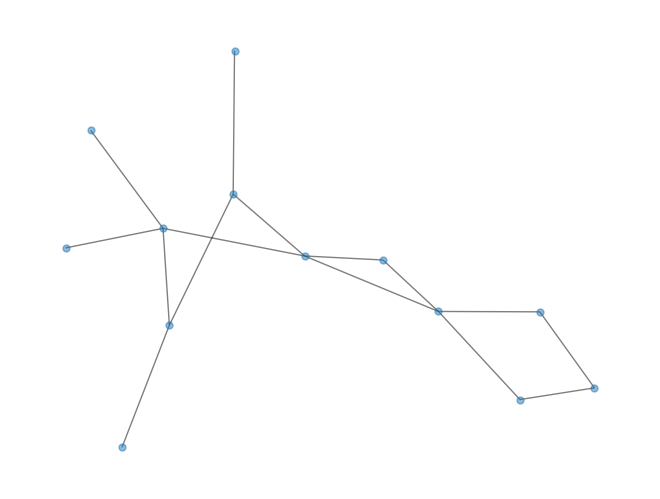

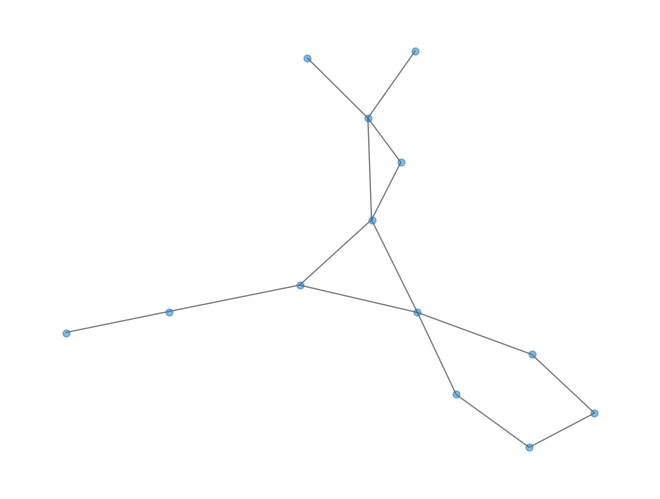

In [95]:
trans_mat = trainer.create_transition_matrix(50000)
graph_synthetic = []
for i in range(3):
    graph_sampled = graph_from_scores(trans_mat, n_edges)
    graph_synthetic.append(graph_sampled)
    graph_nx_sampled = nx.from_numpy_array(graph_sampled)
    nx.draw(graph_nx_sampled, node_size=25, alpha=0.5)
    plt.show()

In [100]:
temp = nx.from_numpy_array(graph_synthetic[3])

IndexError: list index out of range

In [114]:
temp

In [115]:
temp_m = nx.to_scipy_sparse_matrix(temp)

/var/folders/rw/56p7h0px0xl82phr2ps3qy8c0000gn/T/ipykernel_17491/1836056761.py:1: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  temp_m = nx.to_scipy_sparse_matrix(temp)


In [116]:
temp_m

<13x13 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

In [117]:
print(temp)

Graph with 13 nodes and 15 edges


In [118]:
not_methane

<13x13 sparse matrix of type '<class 'numpy.int64'>'
	with 30 stored elements in Compressed Sparse Row format>

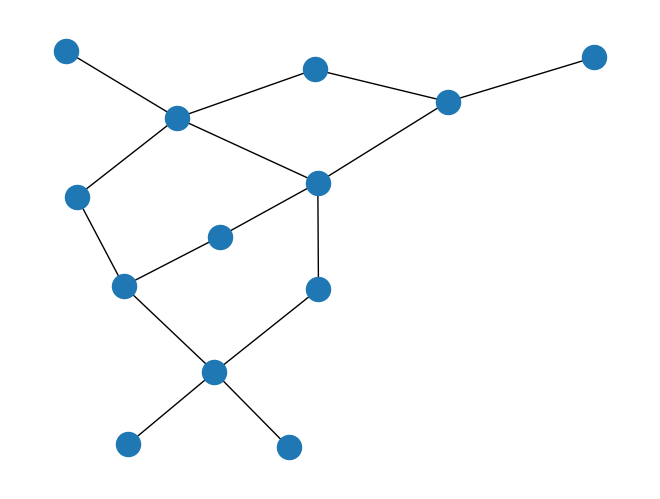

In [119]:
nx.draw(temp)

In [120]:
temp = nx.from_numpy_array(graph_synthetic[1])
torch_geometric.utils.convert.from_networkx(temp)

Data(edge_index=[2, 30], weight=[30], num_nodes=13)

KeyError: 0

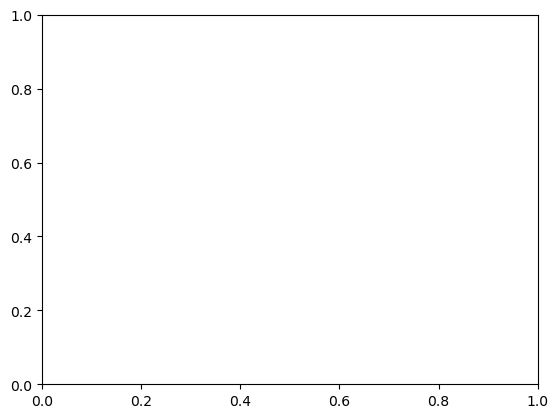

In [62]:
nx.draw_networkx_labels(temp, {'H': 0, 'C': 1, 'N': 2, 'O': 3, 'F': 4})
# temp_mat = nx.from_scipy_sparse_matrix(temp)

# sample = to_networkx(sample)
# sample_mat = nx.to_scipy_sparse_matrix(sample)